#### import necessary libraries

In [14]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### read in the data

In [2]:
data1 = pd.read_csv('gapminder2.csv', low_memory=False)

#### remove unnecessary columns and make a copy of the subdata

In [3]:
data2 = data1[["continent", "country", "breastcancerper100th", "urbanrate", "incomeperperson", "breastcancernbdeaths"]]
data = data2.copy()

#### remove missing values(in my case '0' values)

In [4]:
data= data.replace(0, np.NaN)
data = data.dropna()

#### Change the data type for chosen variables

In [5]:
data['breastcancerper100th'] = pd.to_numeric(data['breastcancerper100th'])
data['urbanrate'] = pd.to_numeric(data['urbanrate'])

#### Create variable quartiles and calculate frequency in bins

In [6]:
print('Categories of breast cancer cases per 100 000 females:')
data['cancercaseslabel'] =pd.cut(data.breastcancerper100th,4,labels=['low','medium','high','very high'])
breastcan_freq = pd.concat(dict(counts = data["cancercaseslabel"].value_counts(sort=False, dropna=False),
                                   percentages = data["cancercaseslabel"].value_counts(sort=False, dropna=False,
                                                                                       normalize=True)),
                            axis=1)
print("Frequency distribution - breast cancer bins:\n", breastcan_freq)
print('\n')

Categories of breast cancer cases per 100 000 females:
Frequency distribution - breast cancer bins:
            counts  percentages
high           17     0.103030
low            77     0.466667
medium         54     0.327273
very high      17     0.103030




In [8]:
data['urbanratepercent'] =pd.cut(data.urbanrate,4,labels=['0-25%','26-50%','51-74%','75-100%'])
urban_freq = pd.concat(dict(counts = data["urbanratepercent"].value_counts(sort=False, dropna=False),
                                   percentages = data["urbanratepercent"].value_counts(sort=False, dropna=False,
                                                                                       normalize=True)),
                            axis=1)
print("Frequency distribution - urban rate:\n", urban_freq)

Frequency distribution - urban rate:
          counts  percentages
0-25%        32     0.193939
26-50%       42     0.254545
51-74%       61     0.369697
75-100%      30     0.181818


#### contingency table of observed counts

In [9]:
print('Contingency table of observed counts')
ct1=pd.crosstab(data['cancercaseslabel'], data['urbanratepercent'])
print (ct1)
print('\n')

Contingency table of observed counts
urbanratepercent  0-25%  26-50%  51-74%  75-100%
cancercaseslabel                                
high                  0       4       9        4
low                  26      27      19        5
medium                6      11      29        8
very high             0       0       4       13




#### column percentages

In [11]:
print('Column percentages')
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)
print('\n')

Column percentages
urbanratepercent   0-25%    26-50%    51-74%   75-100%
cancercaseslabel                                      
high              0.0000  0.095238  0.147541  0.133333
low               0.8125  0.642857  0.311475  0.166667
medium            0.1875  0.261905  0.475410  0.266667
very high         0.0000  0.000000  0.065574  0.433333




#### Chi-square

In [12]:
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)
print('\n')

chi-square value, p value, expected counts
(71.798834424480177, 6.7520667625654625e-12, 9, array([[  3.2969697 ,   4.32727273,   6.28484848,   3.09090909],
       [ 14.93333333,  19.6       ,  28.46666667,  14.        ],
       [ 10.47272727,  13.74545455,  19.96363636,   9.81818182],
       [  3.2969697 ,   4.32727273,   6.28484848,   3.09090909]]))




#### graph percent with new cases of breast cancer within each urbanisation frequency group 

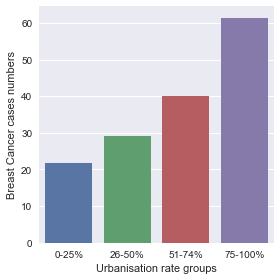

In [15]:
plt.figure(figsize=(18,10))
sns.factorplot(x="urbanratepercent", y="breastcancerper100th", data=data, kind="bar", ci=None)
plt.ylabel('Breast Cancer cases numbers')
plt.xlabel('Urbanisation rate groups')

#### creating a subset to include the 2 variables we want to analyse

In [16]:
sub2 = data[['cancercaseslabel', 'urbanratepercent']]

#### COMPARISON 1 Bonferroni Adjustment

In [28]:
print('COMPARISON 1 Bonferroni Adjustment')
recode1 = {'0-25%':'0-25%', '26-50%': '26-50%'}
sub2['COMP1vs2']= sub2['urbanratepercent'].map(recode1)


COMPARISON 1 Bonferroni Adjustment


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### contingency table of observed counts

In [30]:
print('Contingency table of observed counts')
ct2=pd.crosstab(sub2['cancercaseslabel'], sub2['COMP1vs2'])
print (ct2)

Contingency table of observed counts
COMP1vs2          0-25%  26-50%
cancercaseslabel               
high                  0       4
low                  26      27
medium                6      11
very high             0       0


#### column percentages

In [31]:
print('Column percentages')
colsum=ct2.sum(axis=0)
colpct=ct2/colsum
print(colpct)

Column percentages
COMP1vs2           0-25%    26-50%
cancercaseslabel                  
high              0.0000  0.095238
low               0.8125  0.642857
medium            0.1875  0.261905
very high         0.0000  0.000000


#### Chi-square

In [32]:
print ('chi-square value, p value, expected counts')
cs2= scipy.stats.chi2_contingency(ct2)
print (cs2)

chi-square value, p value, expected counts


ValueError: The internally computed table of expected frequencies has a zero element at (3, 0).

#### COMPARISON 2 Bonferroni Adjustment

In [33]:
print('COMPARISON 2 Bonferroni Adjustment')
recode2 = {'0-25%':'0-25%', '51-74%': '51-74%'}
sub2['COMP1vs3']= sub2['urbanratepercent'].map(recode2)

COMPARISON 2 Bonferroni Adjustment


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### contingency table of observed counts

In [34]:
print('Contingency table of observed counts')
ct3=pd.crosstab(sub2['cancercaseslabel'], sub2['COMP1vs3'])
print (ct3)

Contingency table of observed counts
COMP1vs3          0-25%  51-74%
cancercaseslabel               
high                  0       9
low                  26      19
medium                6      29
very high             0       4


#### column percentages

In [35]:
print('Column percentages')
colsum=ct3.sum(axis=0)
colpct=ct3/colsum
print(colpct)

Column percentages
COMP1vs3           0-25%    51-74%
cancercaseslabel                  
high              0.0000  0.147541
low               0.8125  0.311475
medium            0.1875  0.475410
very high         0.0000  0.065574


#### Chi-square

In [36]:
print ('chi-square value, p value, expected counts')
cs3= scipy.stats.chi2_contingency(ct3)
print (cs3)

chi-square value, p value, expected counts
(22.33161592505855, 5.5646065541129641e-05, 3, array([[  3.09677419,   5.90322581],
       [ 15.48387097,  29.51612903],
       [ 12.04301075,  22.95698925],
       [  1.37634409,   2.62365591]]))


#### COMPARISON 3 Bonferroni Adjustment

In [37]:
print('COMPARISON 3 Bonferroni Adjustment')
recode3 = {'0-25%':'0-25%', '75-100%': '75-100%'}
sub2['COMP1vs4']= sub2['urbanratepercent'].map(recode3)

COMPARISON 3 Bonferroni Adjustment


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### contingency table of observed counts

In [38]:
print('Contingency table of observed counts')
ct4=pd.crosstab(sub2['cancercaseslabel'], sub2['COMP1vs4'])
print (ct4)

Contingency table of observed counts
COMP1vs4          0-25%  75-100%
cancercaseslabel                
high                  0        4
low                  26        5
medium                6        8
very high             0       13


#### column percentages

In [39]:
print('Column percentages')
colsum=ct4.sum(axis=0)
colpct=ct4/colsum
print(colpct)

Column percentages
COMP1vs4           0-25%   75-100%
cancercaseslabel                  
high              0.0000  0.133333
low               0.8125  0.166667
medium            0.1875  0.266667
very high         0.0000  0.433333


#### Chi-square

In [40]:
print ('chi-square value, p value, expected counts')
cs4= scipy.stats.chi2_contingency(ct4)
print (cs4)

chi-square value, p value, expected counts
(31.479761904761908, 6.7360294479546027e-07, 3, array([[  2.06451613,   1.93548387],
       [ 16.        ,  15.        ],
       [  7.22580645,   6.77419355],
       [  6.70967742,   6.29032258]]))


#### COMPARISON 4 Bonferroni Adjustment

In [41]:
print('COMPARISON 4 Bonferroni Adjustment')
recode4 = {'26-50%':'26-50%', '51-74%': '51-74%'}
sub2['COMP2vs3']= sub2['urbanratepercent'].map(recode4)

COMPARISON 4 Bonferroni Adjustment


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### contingency table of observed counts

In [42]:
print('Contingency table of observed counts')
ct5=pd.crosstab(sub2['cancercaseslabel'], sub2['COMP2vs3'])
print (ct5)

Contingency table of observed counts
COMP2vs3          26-50%  51-74%
cancercaseslabel                
high                   4       9
low                   27      19
medium                11      29
very high              0       4


#### column percentages

In [43]:
print('Column percentages')
colsum=ct5.sum(axis=0)
colpct=ct5/colsum
print(colpct)

Column percentages
COMP2vs3            26-50%    51-74%
cancercaseslabel                    
high              0.095238  0.147541
low               0.642857  0.311475
medium            0.261905  0.475410
very high         0.000000  0.065574


#### Chi-square

In [44]:
print ('chi-square value, p value, expected counts')
cs5= scipy.stats.chi2_contingency(ct5)
print (cs5)

chi-square value, p value, expected counts
(12.329056489364758, 0.0063368988168448926, 3, array([[  5.30097087,   7.69902913],
       [ 18.75728155,  27.24271845],
       [ 16.31067961,  23.68932039],
       [  1.63106796,   2.36893204]]))


#### COMPARISON 5 Bonferroni Adjustment

In [45]:
print('COMPARISON 5 Bonferroni Adjustment')
recode5 = {'26-50%':'26-50%', '75-100%': '75-100%'}
sub2['COMP2vs4']= sub2['urbanratepercent'].map(recode5)

COMPARISON 5 Bonferroni Adjustment


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### contingency table of observed counts

In [46]:
print('Contingency table of observed counts')
ct6=pd.crosstab(sub2['cancercaseslabel'], sub2['COMP2vs4'])
print (ct6)

Contingency table of observed counts
COMP2vs4          26-50%  75-100%
cancercaseslabel                 
high                   4        4
low                   27        5
medium                11        8
very high              0       13


#### column percentages

In [47]:
print('Column percentages')
colsum=ct6.sum(axis=0)
colpct=ct6/colsum
print(colpct)

Column percentages
COMP2vs4            26-50%   75-100%
cancercaseslabel                    
high              0.095238  0.133333
low               0.642857  0.166667
medium            0.261905  0.266667
very high         0.000000  0.433333


#### Chi-square

In [48]:
print ('chi-square value, p value, expected counts')
cs6= scipy.stats.chi2_contingency(ct6)
print (cs6)

chi-square value, p value, expected counts
(27.35864661654135, 4.9512621235208696e-06, 3, array([[  4.66666667,   3.33333333],
       [ 18.66666667,  13.33333333],
       [ 11.08333333,   7.91666667],
       [  7.58333333,   5.41666667]]))


#### COMPARISON 6 Bonferroni Adjustment

In [49]:
print('COMPARISON 6 Bonferroni Adjustment')
recode6 = {'51-74%':'51-74%', '75-100%': '75-100%'}
sub2['COMP3vs4']= sub2['urbanratepercent'].map(recode6)

COMPARISON 6 Bonferroni Adjustment


#### contingency table of observed counts

In [50]:
print('Contingency table of observed counts')
ct7=pd.crosstab(sub2['cancercaseslabel'], sub2['COMP3vs4'])
print (ct7)

Contingency table of observed counts
COMP3vs4          51-74%  75-100%
cancercaseslabel                 
high                   9        4
low                   19        5
medium                29        8
very high              4       13


#### column percentages

In [52]:
print('Column percentages')
colsum=ct7.sum(axis=0)
colpct=ct7/colsum
print(colpct)

Column percentages
COMP3vs4            51-74%   75-100%
cancercaseslabel                    
high              0.147541  0.133333
low               0.311475  0.166667
medium            0.475410  0.266667
very high         0.065574  0.433333


#### Chi-square

In [53]:
print ('chi-square value, p value, expected counts')
cs7= scipy.stats.chi2_contingency(ct7)
print (cs7)

chi-square value, p value, expected counts
(18.341429459835922, 0.00037398625793033522, 3, array([[  8.71428571,   4.28571429],
       [ 16.08791209,   7.91208791],
       [ 24.8021978 ,  12.1978022 ],
       [ 11.3956044 ,   5.6043956 ]]))
